In [125]:
import os
import pathlib
import random
import numpy as np
import tensorflow as tf

In [126]:
path = pathlib.Path('annotations/trimaps/')
sorted(path.glob('*.png')) == list(path.glob('*.png'))

False

In [127]:
path2 = pathlib.Path('images/')
sorted(path.glob('*.png')) == list(path.glob('*.png'))

False

In [128]:
input_ = list(path2.glob('*.jpg'))
random.shuffle(input_)

In [129]:
target = list(path.glob('*.png'))
random.shuffle(target)

In [130]:
y  = tf.keras.preprocessing.image.load_img(input_[0], target_size=(160,160), color_mode='grayscale')

In [131]:
np.array(y)

array([[ 66,  67,  67, ...,  51,  53,  52],
       [ 65,  67,  63, ...,  50,  54,  52],
       [ 66,  65,  39, ...,  54,  55,  54],
       ...,
       [103, 102, 103, ..., 109, 107, 105],
       [101, 102, 103, ..., 106, 106, 108],
       [101, 101, 102, ..., 107, 106, 106]], dtype=uint8)

# Data pipeline

- tf.data.Dataset
- c.f) dataset, dataloader # 인덱싱, 슬라이싱 가능

In [132]:
class OxfordPet(tf.keras.utils.Sequence):
    
    def __init__(self, batch_size, img_size, input_path, target_path):
        super().__init__()
        self.batch_size = batch_size
        self.w, self.h = img_size
        self.input_path = input_path
        self.target_path = target_path

    def __getitem__(self, x):
        idx = x * self.batch_size
        batch_input = self.input_path[idx:idx+self.batch_size]
        batch_target = self.target_path[idx:idx+self.batch_size]
        X = np.zeros((self.batch_size, self.w,self.h,3), dtype=np.float32)
        for i, j in enumerate(batch_input):
            X[i] = tf.keras.preprocessing.image.load_img(j, target_size=(self.w, self.h))
        y = np.zeros((self.batch_size, self.w, self.h,1), dtype=np.uint8)
        for i, j in enumerate(batch_target):
            y[i] = np.array(tf.keras.preprocessing.image.load_img(j, target_size=(self.w, self.h), color_mode='grayscale'))[...,np.newaxis]
        return X,y
    
    def __len__(self):
        return len(self.target_path) // self.batch_size

In [133]:
op = OxfordPet(32, (160,160), input_, target)

In [134]:
input_ = tf.keras.Input((160,160,3))

In [135]:
# 참고
xe = tf.keras.applications.Xception()
xe.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_23[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_59 (Add)                   (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_58[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_59[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_62 (A

In [136]:
u = []
input_ = tf.keras.Input((160,160,3))

# contracting path
x = tf.keras.layers.Conv2D(32, 3, strides=2, padding='same')(input_)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

pa = x
u.append(x)

In [137]:
for f in [64, 128, 256]:
    x = tf.keras.layers.SeparableConv2D(f, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(3, 2, padding='same')(x)
    
    short = tf.keras.layers.Conv2D(f, 1, strides=2, padding='same')(pa)
    x = tf.keras.layers.Add()([x, short])
    pa = x
    u.append(pa)

In [138]:
us = list(reversed(u))

In [139]:
us

[<KerasTensor: shape=(None, 10, 10, 256) dtype=float32 (created by layer 'add_66')>,
 <KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'add_65')>,
 <KerasTensor: shape=(None, 40, 40, 64) dtype=float32 (created by layer 'add_64')>,
 <KerasTensor: shape=(None, 80, 80, 32) dtype=float32 (created by layer 're_lu_90')>]

In [140]:
# expanding path
for i,f in enumerate([256, 128, 64, 32]):
    x = tf.keras.layers.Conv2DTranspose(f, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Concatenate()([x, us[i]]) # add
    x = tf.keras.layers.UpSampling2D()(x)

In [141]:
x = tf.keras.layers.Conv2D(3, 3, padding='same', activation='softmax')(x)

In [142]:
model = tf.keras.Model(input_, x)

In [143]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_70 (Conv2D)             (None, 80, 80, 32)   896         ['input_24[0][0]']               
                                                                                                  
 batch_normalization_98 (BatchN  (None, 80, 80, 32)  128         ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                            

 concatenate_5 (Concatenate)    (None, 20, 20, 256)  0           ['re_lu_95[0][0]',               
                                                                  'add_65[0][0]']                 
                                                                                                  
 up_sampling2d_25 (UpSampling2D  (None, 40, 40, 256)  0          ['concatenate_5[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_transpose_29 (Conv2DTra  (None, 40, 40, 64)  147520      ['up_sampling2d_25[0][0]']       
 nspose)                                                                                          
                                                                                                  
 batch_normalization_104 (Batch  (None, 40, 40, 64)  256         ['conv2d_transpose_29[0][0]']    
 Normaliza

In [151]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)) #, optimizer=tf.keras.optimizers.RMSprop)
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

In [144]:
# %pip install -U model_profiler

In [145]:
import model_profiler

In [146]:
print(model_profiler.model_profiler(model, 32))

| Model Profile                    | Value   | Unit    |
|----------------------------------|---------|---------|
| Selected GPUs                    | ['0']   | GPU IDs |
| No. of FLOPs                     | 0.0236  | BFLOPs  |
| GPU Memory Requirement           | 1.0084  | GB      |
| Model Parameters                 | 1.4598  | Million |
| Memory Required by Model Weights | 5.5689  | MB      |


2022-08-24 20:31:52.136667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-24 20:31:52.136731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/hdj/miniforge3/envs/tf/lib/python3.9/site-packages/model_profiler/profiler.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.asarray(values).reshape(-1,1),


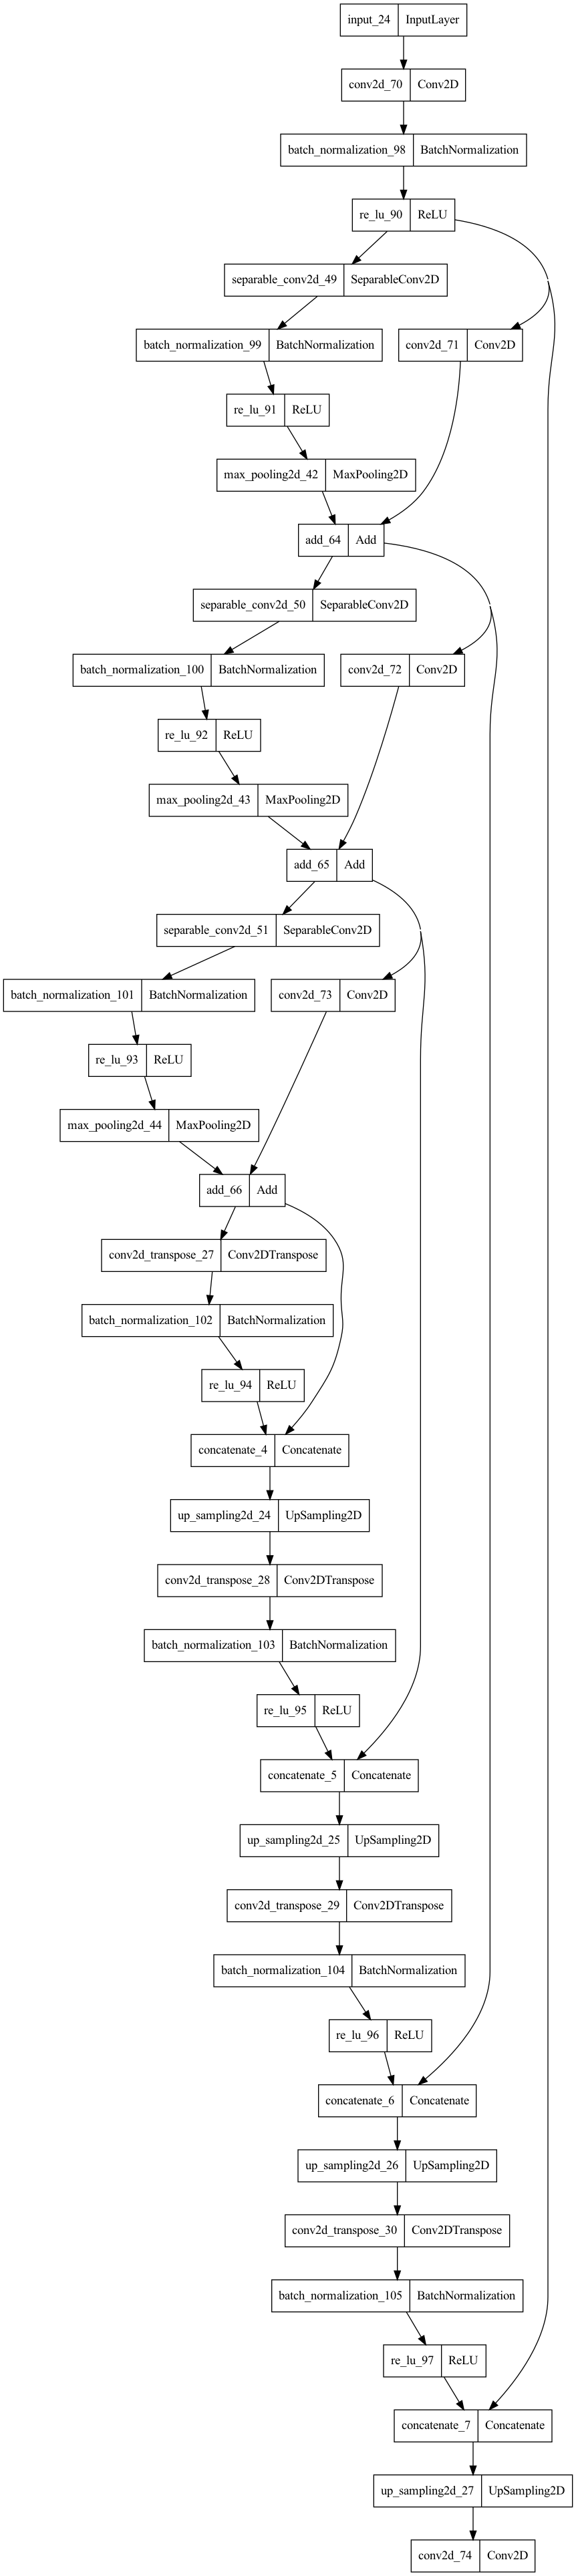

In [147]:
tf.keras.utils.plot_model(model)